# Preprocessing Data

Loading in the data -> doing preprocessing and exporing data for the analysis step.


Preprocessing steps (Max's comments):

1. load in MNE data

2. Downsample

3. Apply bandpass filter

4. Remve faulty channels

5. Perform average re-referencing

6. Epoch the data

7. Calculate features 

8. Remove bad epochs on a feature level

9. Calculate stats


Looking at subject 3

In [1]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [2]:
pwd

'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500'

In [15]:
raw_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/fif/sub20_ses03-raw.fif'
raw = mne.io.read_raw_fif(raw_dir)
raw

Opening raw data file /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/fif/sub20_ses03-raw.fif...
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.


<Raw | sub20_ses03-raw.fif, 70 x 479200 (95.8 s), ~100 kB, data not loaded>

In [16]:
raw.load_data()

Reading 0 ... 479199  =      0.000 ...    95.840 secs...


<Raw | sub20_ses03-raw.fif, 70 x 479200 (95.8 s), ~256.0 MB, data loaded>

In [29]:
raw.plot()

Channels marked as bad:
none
Channels marked as bad:
['C3']


Resampling data to 1000Hz

In [18]:

## Downsample to 100 Hz
#print('Original sampling rate:', epochs.info['sfreq'], 'Hz')
#epochs_resampled = epochs.resample(100, copy=True)
#print('New sampling rate:', epochs_resampled.info['sfreq']'Hz')

data_resampled = raw.copy().resample(1000)


In [8]:
data_resampled.plot()

Channels marked as bad:
none


In [271]:
raw.info['sfreq']

5000.0

In [732]:

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(7, 3))

n_samples_to_plot = int(0.5 * raw.info['sfreq'])  # plot 0.5 seconds of data
plt.plot(raw.times[:n_samples_to_plot],
         raw.get_data()[2, :n_samples_to_plot], color='black')

n_samples_to_plot = int(0.5 * data_resampled.info['sfreq'])
plt.plot(data_resampled.times[:n_samples_to_plot],
         data_resampled.get_data()[2, :n_samples_to_plot],
         '-o', color='red')

plt.xlabel('time (s)')
plt.legend(['original', 'downsampled'], loc='best')
plt.title('Effect of downsampling')
mne.viz.tight_layout()

Bandpass-filter

In [19]:
filtered_data = data_resampled.copy().filter(1, 100)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.5s finished


In [452]:
#filtered_data.plot()

In [20]:
stim_chan = filtered_data.copy().pick_channels(['stim'])
events = mne.event.find_events(stim_chan)
filtered_data_eeg = filtered_data.copy().pick_types(eeg=True)

31 events found
Event IDs: [1 2]


In [21]:
filtered_data_eeg.plot()

Channels marked as bad:
['AF7', 'F6']


Reject bad channels

In [22]:
filtered_data_eeg.info['bads'].extend(['AF8','AF7','AF3','F6','FT10','Fp1','Fp2'])

In [23]:
filtered_data_eeg.info['bads']

['AF7', 'F6', 'AF8', 'AF7', 'AF3', 'F6', 'FT10', 'Fp1', 'Fp2']

In [24]:

new_data = filtered_data_eeg.copy().pick_types(meg=False, eeg=True, exclude=[])
eeg_data_interp = new_data.copy().interpolate_bads()

#for title, data in zip(['orig.', 'interp.'], [new_data, eeg_data_interp]):
 #   fig = data.plot(butterfly=True, color='#00000022', bad_color='r')
  #  fig.subplots_adjust(top=0.9)
   # fig.suptitle(title, size='xx-large', weight='bold')

Interpolating bad channels
    Automatic origin fit: head of radius 96.2 mm
Computing interpolation matrix from 56 sensor positions
Interpolating 7 sensors


Average re-rereferecing

In [26]:
data_avg_ref = eeg_data_interp.copy().set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Epoching

In [27]:
epochs = mne.Epochs(data_avg_ref, events, tmin=-0.1, tmax=1.8, baseline=None)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated


Select manually epochs to remove

In [28]:
epochs.plot()

Using data from preloaded Raw for 31 events and 1901 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 3 events and 1901 original time points ...
Using data from preloaded Raw for 20 events and 1901 original time points ...
Using data from preloaded Raw for 4 events and 1901 

Dropped 3 epochs: 0, 13, 19
The following epochs were marked as bad and are dropped:
[0, 13, 19]
Channels marked as bad:
none


Select epochs to remove

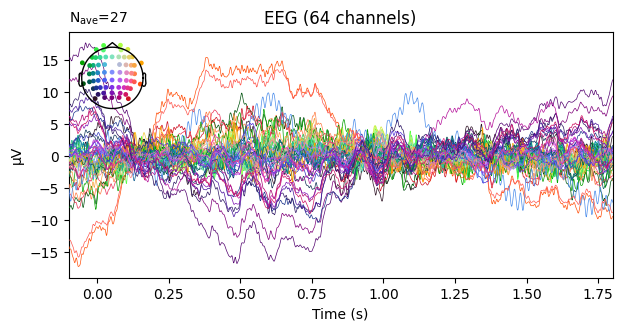

In [461]:
evoked = epochs.copy().average()
evoked.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


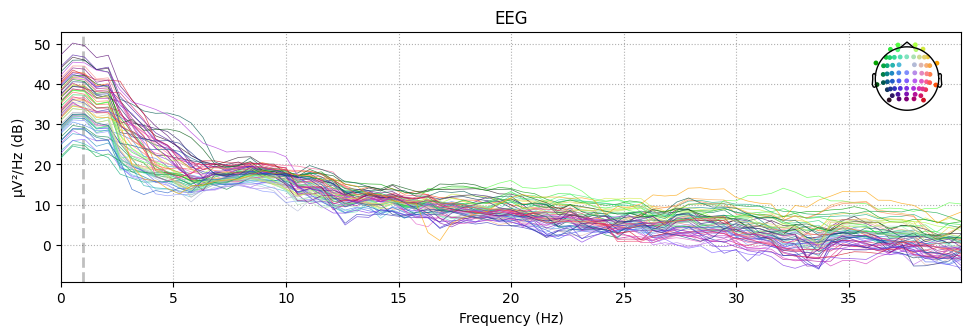

In [253]:
evoked.plot_psd(fmax=40)1

In [462]:
epoch_name = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses10_final-epo.fif'
epochs.save(epoch_name)

Using data from preloaded Raw for 1 events and 1901 original time points ...
Using data from preloaded Raw for 27 events and 1901 original time points ...
Channels marked as bad:
['PO3']
Channels marked as bad:
['FC5']
Dropped 4 epochs: 6, 8, 14, 17
The following epochs were marked as bad and are dropped:
[6, 8, 14, 17]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
['FC1']


In [40]:
mne.viz.set_browser_backend('qt')

'qt'